# Introduction

Partial dependence plots (PDP) and individual conditional expectation (ICE) plots are useful tools for visualizing and analyzing the interaction between the target response and a set of input features. PDPs show the dependence between the target response and the input features, while ICE plots visualize the dependence of the prediction on a feature for each individual sample. These plots help us understand the relationship between the target response and the input features.

# Import the necessary libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Load and prepare the data

In [9]:
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

# Create a DataFrame for easier data manipulation
df = pd.DataFrame(X, columns=feature_names)

# Train a Random Forest model

In [10]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

# Create and visualize partial dependence plots

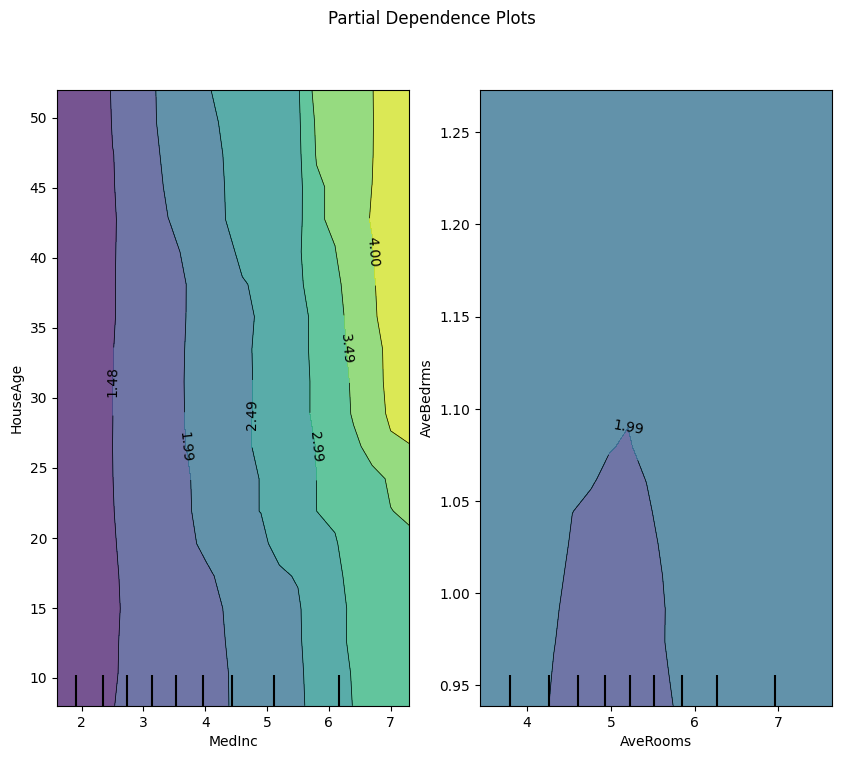

In [15]:
# Generate Partial Dependence Plots
display = PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=[(0, 1), (2, 3)],   # 2D interactions
    feature_names=feature_names,
    grid_resolution=20,
)

# Access the figure from the display object
display.figure_.set_size_inches(10, 8)
display.figure_.suptitle("Partial Dependence Plots")

plt.show()

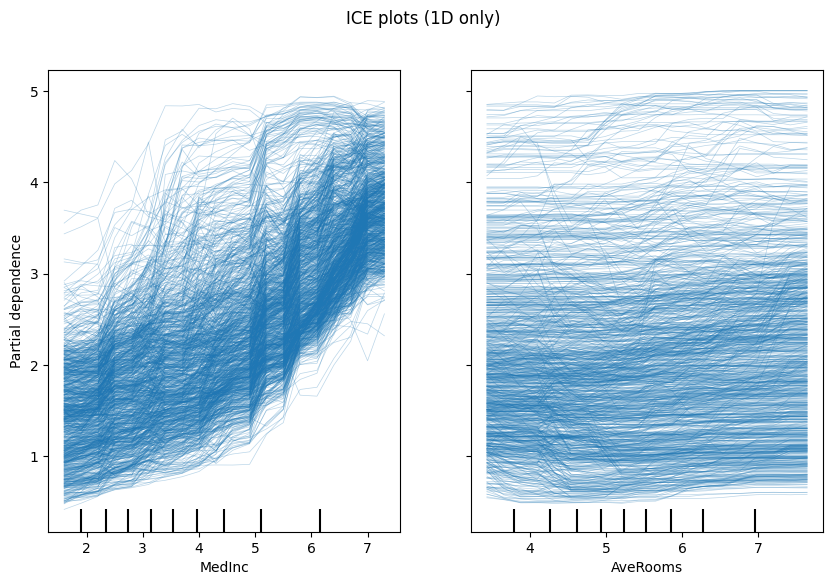

In [17]:
display = PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=["MedInc", "AveRooms"],  # 1D features
    feature_names=data.feature_names,
    kind="individual",  # ICE works
    grid_resolution=20,
)

display.figure_.set_size_inches(10, 6)
display.figure_.suptitle("ICE plots (1D only)")
plt.show()


# Compute partial dependence values for a specific feature

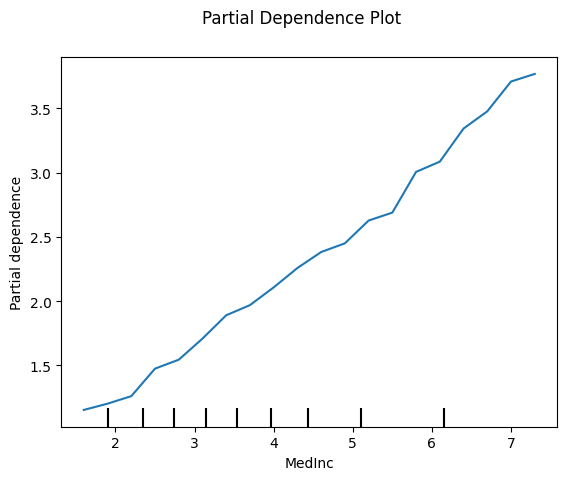

In [19]:
from sklearn.inspection import PartialDependenceDisplay

x_index = 0  # MedInc
display = PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=[x_index],              # индекс или имя фичи
    feature_names=feature_names,
    kind="average",                  # можно 'individual' или 'both'
    grid_resolution=20,
)

display.figure_.suptitle("Partial Dependence Plot")
plt.show()


# Compute individual conditional expectation values for a specific feature

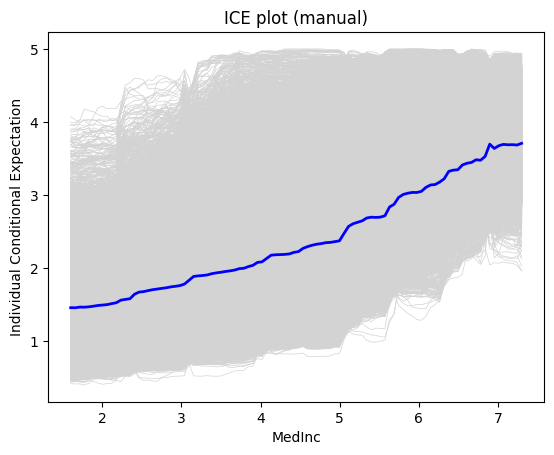

In [21]:
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt
import numpy as np

x_index = 0
res = partial_dependence(model, X, features=[x_index], kind="individual")

ice = res["individual"][0]      # shape (n_samples, grid_resolution)
xx  = res["grid_values"][0]     # x-axis grid

# Manual plotting (like your snippet)
for row in ice:
    plt.plot(xx, row, color="lightgray", linewidth=0.5)

plt.plot(xx, np.mean(ice, axis=0), color="blue", linewidth=2)
plt.xlabel(feature_names[x_index])
plt.ylabel("Individual Conditional Expectation")
plt.title("ICE plot (manual)")
plt.show()


# Summary

Partial dependence plots and individual conditional expectation plots are powerful tools for visualizing and understanding the relationship between the target response and the input features. PDPs provide an overall view of the dependence, while ICE plots show the individual variations. By using these plots, we can gain insights into how the target response changes with respect to different values of the input features.